# Relatório de Análise VII

## Criando Agrupamentos

In [41]:
import pandas as pd

In [42]:
dataset = pd.read_csv('dados/alugueis_residencial_tratado_melhorado.csv', sep=';')
dataset.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Casa
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [43]:
#mostra a media da coluna valor
dataset['Valor'].mean()

5029.848610924708

In [44]:
dataset['Bairro'].drop_duplicates().head(30)

0                   Copacabana
1              Jardim Botânico
2                       Centro
3                 Higienópolis
4                     Cachambi
5              Barra da Tijuca
6                        Ramos
7                       Grajaú
8          Lins de Vasconcelos
12                    Botafogo
13                     Taquara
14     Freguesia (Jacarepaguá)
16                      Tijuca
18                      Olaria
20                      Leblon
21                     Ipanema
24                Campo Grande
28    Recreio dos Bandeirantes
31             Jardim Oceânico
38                     Humaitá
46                   Península
48                       Méier
49              Vargem Pequena
51                    Maracanã
53                 Jacarepaguá
59                 São Conrado
64              Vila Valqueire
65                       Gávea
68                 Cosme Velho
69                  Bonsucesso
Name: Bairro, dtype: object

In [45]:
bairros = ['Barra da Tijuca','Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dataset['Bairro'].isin(bairros)
dataset = dataset[selecao]

In [46]:
dataset['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
12           Botafogo
16             Tijuca
20             Leblon
21            Ipanema
80           Flamengo
Name: Bairro, dtype: object

In [47]:
#cria um grupo com os itens da coluna
grupo_bairro = dataset.groupby('Bairro')

In [48]:
#objeto do tipo DataFrameGroupBy
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [49]:
#dicionario com os itens e os indexs q ele aparece
#faz uma indexação do DF para facilitar as consultas
grupo_bairro.groups

{'Barra da Tijuca': [5, 15, 17, 23, 32, 34, 37, 44, 45, 62, 63, 66, 70, 76, 81, 95, 109, 112, 114, 119, 132, 134, 138, 154, 157, 159, 169, 170, 177, 190, 193, 212, 219, 226, 229, 238, 239, 242, 245, 250, 265, 271, 281, 283, 298, 299, 300, 302, 309, 315, 318, 332, 342, 343, 352, 367, 373, 375, 381, 387, 394, 396, 407, 419, 439, 440, 442, 443, 446, 456, 459, 470, 471, 473, 481, 484, 492, 502, 508, 511, 519, 535, 546, 547, 548, 549, 552, 556, 561, 563, 564, 565, 581, 595, 598, 599, 601, 605, 607, 612, ...], 'Botafogo': [12, 25, 50, 89, 90, 113, 121, 129, 136, 201, 205, 230, 341, 369, 422, 423, 458, 506, 532, 534, 554, 604, 660, 696, 730, 768, 777, 798, 836, 841, 875, 933, 942, 946, 1024, 1063, 1101, 1113, 1133, 1139, 1150, 1163, 1188, 1225, 1229, 1230, 1248, 1275, 1308, 1321, 1330, 1343, 1374, 1411, 1445, 1450, 1487, 1550, 1562, 1612, 1664, 1668, 1690, 1706, 1727, 1736, 1778, 1779, 1827, 1855, 1864, 1867, 1894, 1964, 1974, 2000, 2015, 2024, 2032, 2073, 2110, 2113, 2126, 2128, 2129, 2133, 

In [50]:
for bairro, data in grupo_bairro:
    print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [51]:
#dados é um DF para cada bairro com seus dados
for bairro, data in grupo_bairro:
    print(type(data))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [52]:
#calcula o valor medio para cada bairro
for bairro, data in grupo_bairro:
    print(f'{bairro} -> {data.Valor.mean().round(2)}')

Barra da Tijuca -> 6962.35
Botafogo -> 8522.79
Copacabana -> 4096.41
Flamengo -> 4103.39
Ipanema -> 9170.72
Leblon -> 8581.58
Tijuca -> 2043.52


In [53]:
#Forma simples
grupo_bairro['Valor'].mean()

Bairro
Barra da Tijuca    6962.353253
Botafogo           8522.794536
Copacabana         4096.410011
Flamengo           4103.390821
Ipanema            9170.718016
Leblon             8581.582451
Tijuca             2043.520000
Name: Valor, dtype: float64

In [54]:
#pode fazer com mais de uma variavel e criar um DF
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,6962.35,3537.38
Botafogo,8522.79,981.77
Copacabana,4096.41,1152.28
Flamengo,4103.39,1099.84
Ipanema,9170.72,2283.87
Leblon,8581.58,2091.95
Tijuca,2043.52,711.69


## Estatística Descritiva

In [55]:
#describe() - gera um conjunto de estatistica descritiva
#count = frequencia, mean = media, std = desvio padrao, min = minimo, max = maximo, 25, 50, 75 = primeiro, segundo e terceiro quartio
grupo_bairro['Valor'].describe()

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3966.0,6962.353253,11740.048464,800.0,2500.0,4400.0,8500.0,600000.0
Botafogo,915.0,8522.794536,148669.419958,700.0,2200.0,3000.0,4310.0,4500000.0
Copacabana,2717.0,4096.410011,3572.941254,100.0,2000.0,3000.0,4792.0,35000.0
Flamengo,719.0,4103.390821,3828.552301,800.0,1900.0,2900.0,4900.0,35000.0
Ipanema,1915.0,9170.718016,7971.385799,1200.0,4400.0,7000.0,10500.0,90000.0
Leblon,1322.0,8581.582451,6877.750631,100.0,4500.0,6800.0,10000.0,100000.0
Tijuca,1100.0,2043.520000,1664.337667,750.0,1500.0,1800.0,2300.0,45000.0


In [56]:
#Problemas: o std tem variações muito grandes em botafogo e barra da tijuca
#           o valor máximo apresena valores muito elevados em BTF por exemplo
#           informações estão errôneas, muito provavelmente esses valores correspondem à venda e não à locação

In [57]:
#aggregate mostra o conjunto de estatisticas desejadas
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27612693.0
Botafogo,700.0,4500000.0,7798357.0
Copacabana,100.0,35000.0,11129946.0
Flamengo,800.0,35000.0,2950338.0
Ipanema,1200.0,90000.0,17561925.0
Leblon,100.0,100000.0,11344852.0
Tijuca,750.0,45000.0,2247872.0


In [58]:
#rename() - organiza melhor os nomes
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns={'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27612693.0
Botafogo,700.0,4500000.0,7798357.0
Copacabana,100.0,35000.0,11129946.0
Flamengo,800.0,35000.0,2950338.0
Ipanema,1200.0,90000.0,17561925.0
Leblon,100.0,100000.0,11344852.0
Tijuca,750.0,45000.0,2247872.0


In [59]:
#Conseguimos visualizar os problemas de ultra variação em alguns pontos do DataFrame porque temos poucas informações

## Visualização para grandes quantidades de dados

In [60]:
#para visualizar no jupyter
%matplotlib inline 
import matplotlib.pyplot as plt

In [61]:
#configurar o tamanho desejado para os graficos
plt.rc('figure', figsize = (20,10))

<AxesSubplot: xlabel='Bairro'>

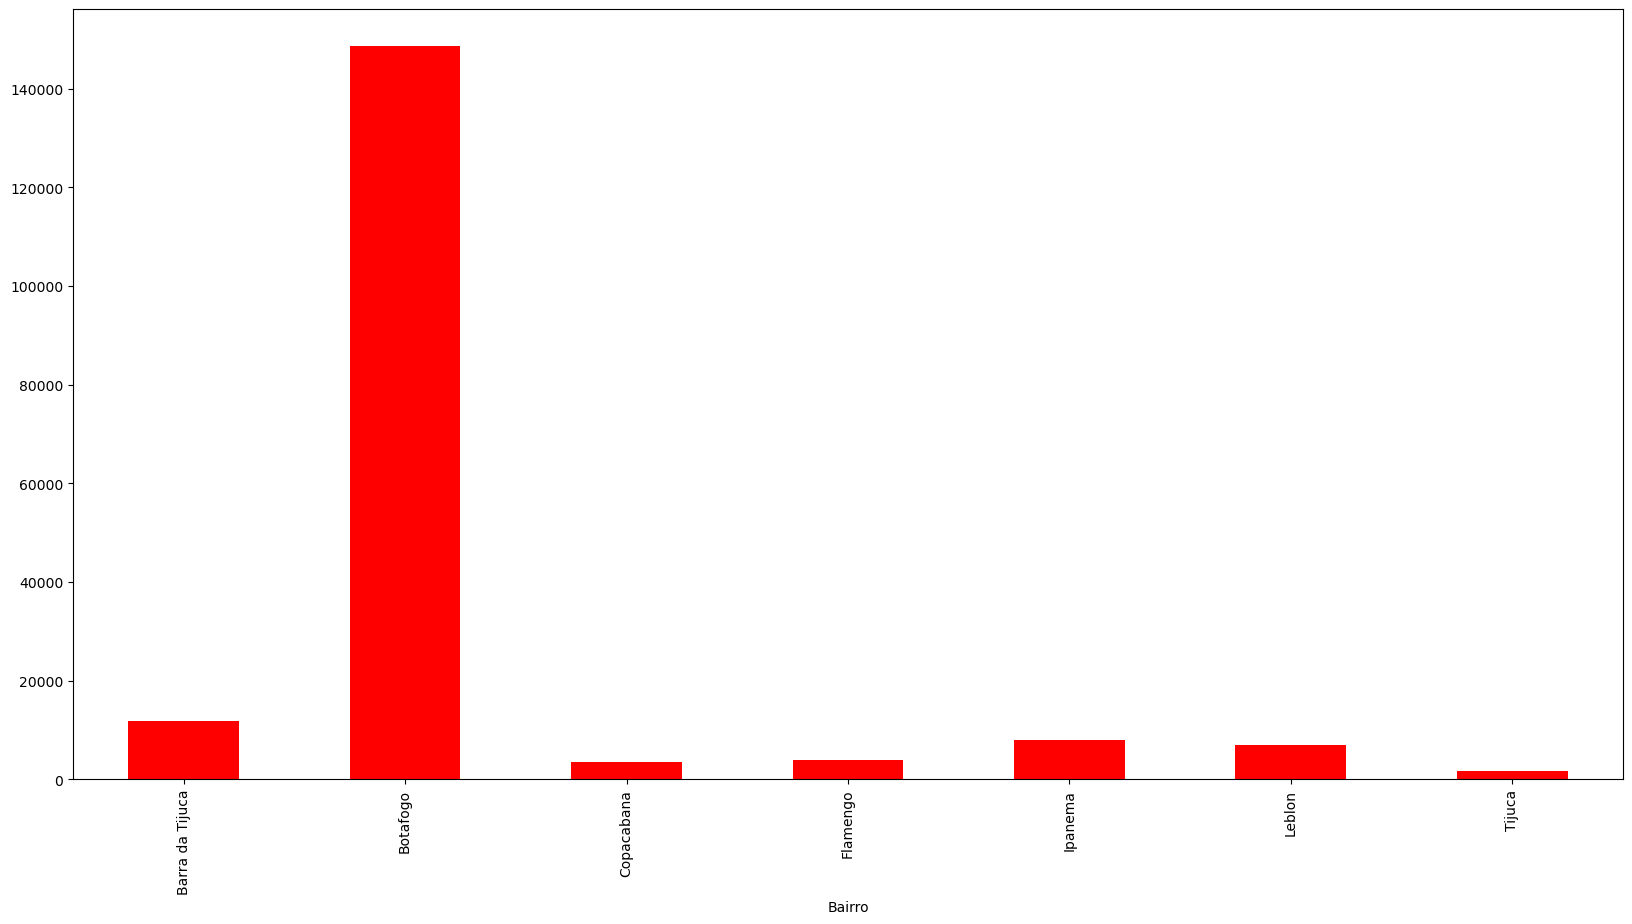

In [63]:
grupo_bairro['Valor'].std().plot.bar(color = 'red')

Text(0.5, 1.0, 'Valor Médio do Aluguel')

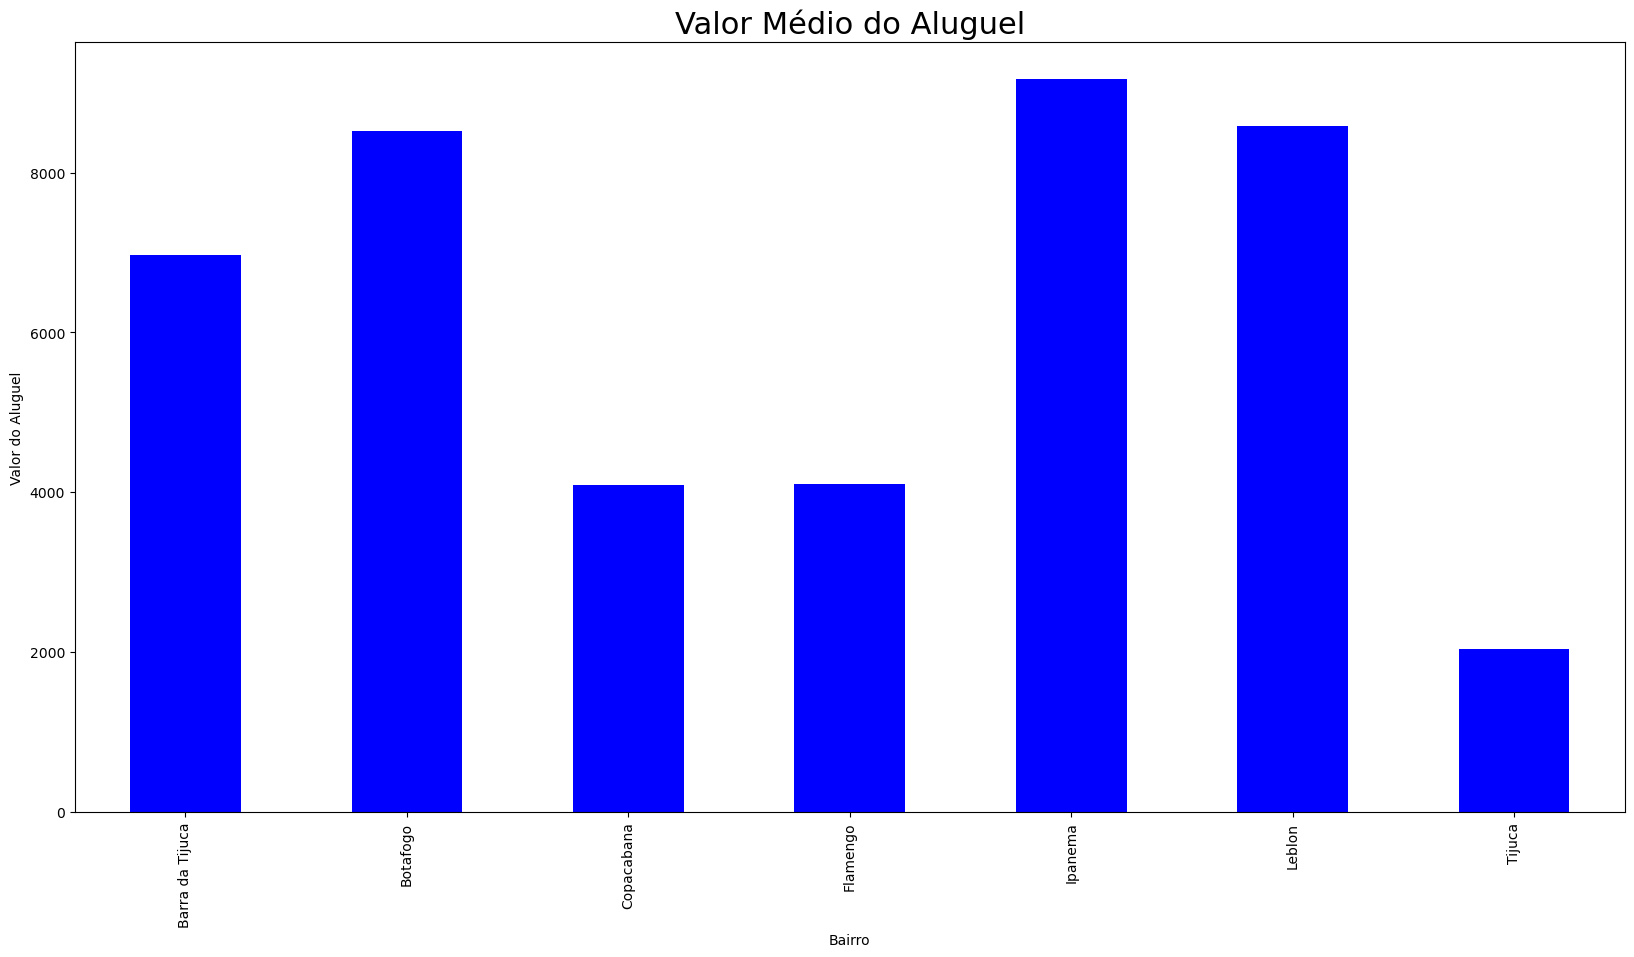

In [66]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel', {'fontsize' : 22})